In [1]:
from astropy.modeling.physical_models import BlackBody
from astropy import units as u
from astropy import constants
from astropy import visualization
import pylab as pl
pl.style.use('dark_background')
pl.rcParams['font.size'] = 18
visualization.quantity_support()

<astropy.visualization.units.quantity_support.<locals>.MplQuantityConverter at 0x7f1b1f21e210>

# AST 4723

# Radio Astronomy

# What's there to see?

In the optical, we see stars, starlight reflected from planets, and nebulae.

In the radio, we see different things...

## In the radio, stars are faint

Stars are, to a first approximation, spherical blackbodies.

Blackbodies are faint in the radio because, on the Rayleigh-Jeans tail... 

POLL

What is the wavelength dependence of a blackbody on the Rayleigh-Jeans tail of the blackbody Planck function?

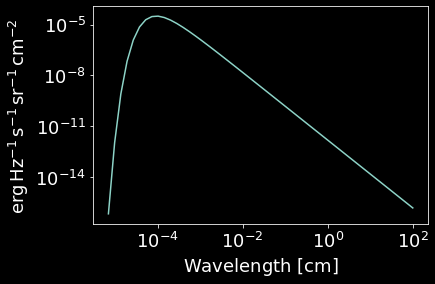

In [2]:
from astropy.modeling.physical_models import BlackBody
wavelength = np.geomspace(70*u.nm, 100*u.cm)
bb = BlackBody(temperature=5500*u.K)(wavelength)
pl.loglog(wavelength, bb)
_=pl.xlabel(f'Wavelength [{wavelength.unit.to_string("latex")}]')

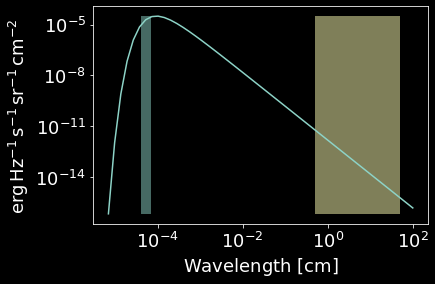

In [3]:
pl.loglog(wavelength, bb)
pl.fill_between(x=[400,700]*u.nm, y1=bb.min(), y2=bb.max(), alpha=0.5)
pl.fill_between(x=[0.5,50]*u.cm, y1=bb.min(), y2=bb.max(), alpha=0.5)
_=pl.xlabel(f'Wavelength [{wavelength.unit.to_string("latex")}]')

## Emission mechanisms

There are three emission mechanisms we generally consider in the radio:

* Thermal continuum, usually Brehmsstrahlung (braking radiation).  Blackbody-like from plasma
* Nonthermal continuum, usually Synchrotron from accelerating electrons around a magnetic field
* Line, transitions between quantum states of an atom or molecule

## Emission mechanisms

In this class, we'll look at thermal emission from the sun and line emission from the Galaxy

## What does the sky look like at different wavelengths?

http://www.chromoscope.net/

# The Sun
The sun appears as a ~5500 K blackbody.

The emission we see in the radio is from the chromosphere, which is slightly larger than the photosphere
<center><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/9f/Solar_eclips_1999_5.jpg/440px-Solar_eclips_1999_5.jpg"></center>

## What will we see when we look at the sun?

The sun will look like a simple bright circle on the sky.

We will see an increase in the *total power*, meaning we will not see any spectral features, just an overall increase in the mean level of signal.

## The sun as our calibrator

We know approximately how bright the surface of the sun is.  We can use it as a calibrator!

## Brightness Temperature

The Rayleigh-Jeans approximation allows us to convert between the sun's flux density (erg/s/cm$^2$/Hz) and surface brightness temperature.  This equation defines Brightness Temperature:

$$T_B = \frac{S_\nu c^2}{ 2 k_B \nu^2}$$

where $S_\nu$ is the flux density, $c$ is the speed of light, $k_B=1.38\times10^{-16}$ erg/K, and $\nu$ is the frequency.

## Surface Brightness 

If you look at the sun with a resolution element smaller than the sun - so, you look with a big telescope - you will always measure the same surface brightness because the sun has a uniform surface brightness:

$T_B = 5500$ K

If you look with a big resolution element (small telescope), the brightness is *diluted*: you average blank sky (zero) with bright emission ($T_B=5500$ K).

## Beam Dilution

The "beam" is our resolution element.  It has an Airy width of 1.22 $\lambda/D \approx 9.2^\circ$.

The sun has an angular radius $\theta_\odot = 0.25^\circ$.

It occupies a *fractional area* $$\frac{\pi \theta_\odot^2}{ \pi (0.45 \lambda / D)^2}$$ = 0.005, or 0.5% of the beam area.

(0.45 is the factor for calculating the radius if we want the integral of the Airy function to be 1)

## Beam Dilution

The sun will occupy about 0.5% of the area of our 1.5m telescope's beam at 20cm.

It will therefore have 0.5% of its typical brightness.  It will have $T_{eff} = T_B \times 0.005 = 27.5$ K

This isn't very bright - the surface of the Earth is brighter - but we will be able to detect it.

# Where is the Sun?  Where is the Galaxy?

Part of the lab requires figuring out where things are on the sky.  Much of that should have been review, but we'll go over it here again.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/8f/Ecliptic_equator_galactic_anim.gif/500px-Ecliptic_equator_galactic_anim.gif">

Ecliptic: Earth's orbit around the Sun

Celestial: Earth's rotation around its axis

Galactic: Sun's orbit around the Galactic Center

## Where are you pointing....

Calculating where to point and when, or what you were pointing at if you were looking in a certain direction, is critical for our observations.  I've provided you with this notebook:
https://colab.research.google.com/github/keflavich/AST4723-Public-Materials/blob/master/Python%20-%20Observation%20Planning.ipynb#
to get you up to speed (it's also on canvas)

# Hydrogen

Our real target is the HI 21 cm Hydrogen Line.

<center><img src="images/500px-Hydrogen-SpinFlip.png" style="background-color: white!important;">
</center>
<!--source: wikipedia page on Hydrogen Line-->

# Hydrogen Line

The HI spin-flip transition is a change in quantum states from parallel spins to antiparallel.

It has a very low spontaneous emission coefficient (Einstein A coefficient) of $A_{ul} = 2.9\times10^{-15} ~\mathrm{s}^{-1}$.

This means that, if a Hydrogen atom is left alone in space, it will on average make this transition once every $3\times10^{14}\mathrm{~s}$:

In [4]:
spinflip_aul = 2.9e-15*u.s**-1
(1/spinflip_aul).to(u.Myr)

<Quantity 10.92692683 Myr>

# Hydrogen Line


This long lifetime means that, as long as a Hydrogen atom sees a source of excitation (like another atom) once every $\sim$10 million years, it can remain in the excited state and ready to emit another photon.

# Hydrogen Line

Why is this line important?

Most of the baryonic matter in the universe is hydrogen (70% or so).

The HI line lets us see all of the hydrogen that is not either (1) ionized, (2) in stars, or (3) in molecules.  

# Hydrogen Line

Where do we see the HI spin-flip transition?

Galactic disks!

<center>
    <img src="https://www.cv.nrao.edu/course/astr534/images/THINGS.jpg" style='max-height:640px'>
    </center>

# Hydrogen Line

We get more than just images, though.  We also get *velocity* information: we can measure how fast the gas is moving

<center><img src="https://www.cv.nrao.edu/course/astr534/images/m33doppler.jpg" style="max-height:600px"></center>

## Velocity: the Doppler formula

The Doppler formula we will use is an approximation of the full Doppler effect (to be discussed later).

$$\Delta v = \frac{\nu_{rest} - \nu}{\nu_{rest}} c$$

where $\nu_{rest}$ is the *rest frequency* of the transition.  For HI, 

$$\nu_{rest} = 1,420,405,751.7667 ~\mathrm{Hz}$$

## Velocity: How fast does stuff move?
Some velocities for reference:

* The Earth's tangential velocity as it orbits the sun is 30 km s$^{-1}$
* Our motion on the Earth's surface, spinning about the Earth's rotation axis, is 0.5 km s$^{-1}$
* Our solar system's Galactic orbital velocity has been measured to be about 250 km s$^{-1}$
* Andromeda is moving toward us at about 110 km s$^{-1}$

## Velocity to frequency

Using the Doppler formula, let's compute the *frequency shift* $\Delta \nu = \nu_{rest}-\nu$ introduced by each of these phenomena:

In [5]:
v_orbit = 30*u.km/u.s
nu_rest_hi = 1420405751.7667*u.Hz
dnu_orbit = (v_orbit / constants.c) * nu_rest_hi
print(dnu_orbit.to(u.Hz))

142138.90782069307 Hz


The others are left as an exercise.

## Spectral Resolution

We return to our instrumentation for a moment.

The *spectral resolution* of an instrument is defined as the smallest distinguishable wavelength or frequency element. 

We usually express it as the ratio of the observed wavelength or frequency to the width of a resolution element:

$$ R = \frac{\nu}{\Delta \nu} = \frac{\lambda}{\Delta \lambda} $$



## Spectral Resolution

Comparing the Spectral Resolution to the Doppler formula:

$$ R = \frac{\nu}{\Delta \nu} = \frac{\lambda}{\Delta \lambda} $$

$$\Delta v = \frac{\Delta \nu}{\nu_{rest}} c$$

we can see that 

$$ R = \frac{c}{\Delta v} $$

## Spectral Resolution

What spectral resolution do we need to detect the Earth's motion around the sun?

In [6]:
resolution_needed = constants.c / v_orbit
print(resolution_needed.decompose())

9993.081933333333


Again, the remaining motions are left as an exercise.

## Radio Spectroscopy: Resolution!!!

What's the resolution of our spectrometer?

$$ R = \frac{\nu}{\Delta \nu} $$

We know our $\nu$, how do we determine the $\Delta \nu$?  

## The Signal

The USB dongle delivers an amplified, frequency-shifted, filtered, digitized signal to the computer.

We take that signal and convert it to a spectrum.

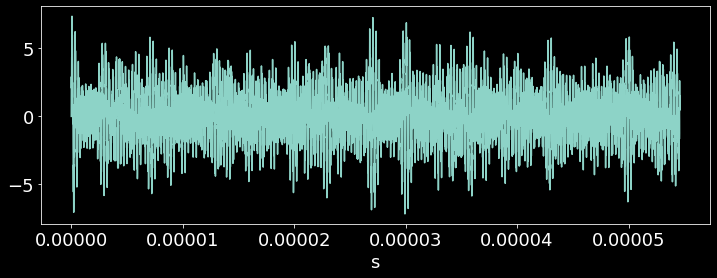

In [7]:
nsamples = 8192
samplerate = 150 * u.MHz
time = (nsamples/samplerate).to(u.s)
frequencies = [3, 3.3, 3.333333, 3.56, 3.7, 4, 21, 35]*u.MHz
theta = np.linspace(0*u.s, time, nsamples)
signals = [np.sin(2*np.pi*(theta * freq).decompose().value) for freq in frequencies]
total_signal = np.sum(signals, axis=0)
pl.figure(figsize=(12,4))
pl.plot(theta, total_signal)

## Our spectrometer does Fourier transforms

We're going to use these, but not go deeply into the math.

In [8]:
ft_signal = np.fft.fft(total_signal)
freq = (np.fft.fftfreq(total_signal.size) * total_signal.size
        / (theta.max()-theta.min())).to(u.MHz)
powerspectrum = np.abs((ft_signal)**2)

(2.5, 4.5)

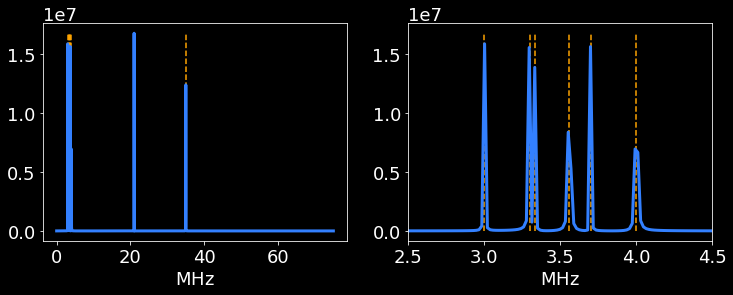

In [9]:
fig = pl.figure(figsize=(12,4))
ax1 = pl.subplot(1,2,1)
ax1.plot(freq[freq>0], powerspectrum[freq>0], color=(0.2,0.5,1), linewidth=3)
ax1.vlines(frequencies, 0, powerspectrum.max(), linestyle='--', color='orange')
#ax1.set_xlim(0,40)
ax2 = pl.subplot(1,2,2)
ax2.plot(freq[freq>0], powerspectrum[freq>0], color=(0.2,0.5,1), linewidth=3)
ax2.vlines(frequencies, 0, powerspectrum.max(), linestyle='--', color='orange')
ax2.set_xlim(2.5,4.5)

## Spectral Resolution

What happens if we decrease the number of samples?

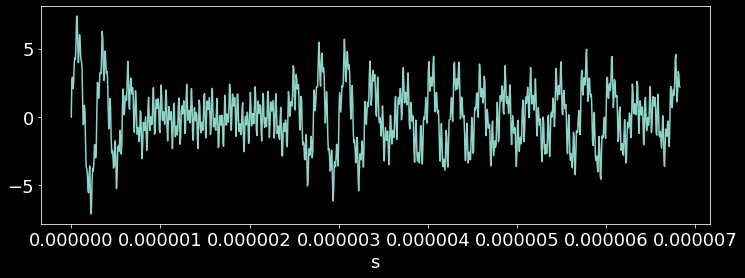

In [10]:
nsamples = 1024
time = nsamples/samplerate
theta = np.linspace(0*u.s, time, nsamples).to(u.s)
signals = [np.sin(2*np.pi*(theta * freq).decompose().value)
           for freq in frequencies]
total_signal = np.sum(signals, axis=0)

ft_signal = np.fft.fft(total_signal)
freq = (np.fft.fftfreq(total_signal.size) * total_signal.size
        / (theta.max()-theta.min())).to(u.MHz)
powerspectrum = np.abs((ft_signal)**2)

pl.figure(figsize=(12,4))
pl.plot(theta, total_signal)

(2.5, 4.5)

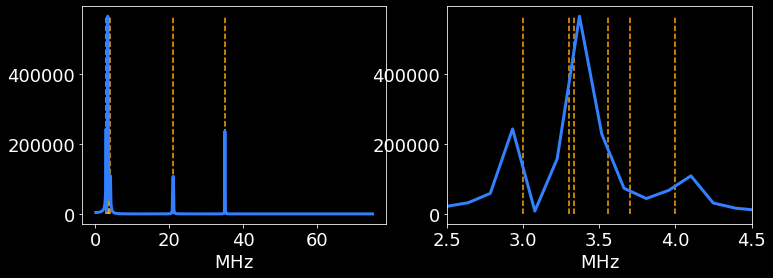

In [11]:
fig = pl.figure(figsize=(12,4))
ax1 = pl.subplot(1,2,1)
ax1.plot(freq[freq>0], powerspectrum[freq>0], color=(0.2,0.5,1), linewidth=3)
ax1.vlines(frequencies, 0, powerspectrum.max(), linestyle='--', color='orange')
#ax1.set_xlim(0,40)
ax2 = pl.subplot(1,2,2)
ax2.plot(freq[freq>0], powerspectrum[freq>0], color=(0.2,0.5,1), linewidth=3)
ax2.vlines(frequencies, 0, powerspectrum.max(), linestyle='--', color='orange')
ax2.set_xlim(2.5,4.5)

## Spectral Resolution

Our *spectral resolution* is related to the *number of samples*.  More samples = higher resolution.

$$\Delta \nu = 2 \nu_{samplerate} / n_{samples}$$

Therefore...

$$ R = \frac{\nu}{\Delta \nu} = \frac{n_{samples} \nu}{2 \nu_{samplerate}} $$

(the factor of 2 comes from the [Nyquist-Shannon Sampling Theorem](https://www.cv.nrao.edu/~sransom/web/A1.html#S3))

## Spectral Resolution

Note that we didn't specify anything about $\nu$ in that equation:

$$ R = \frac{\nu}{\Delta \nu} = \frac{n_{samples} \nu}{2\nu_{samplerate}} $$

If we are observing directly, with no *mixer*, we observe at $\nu = \nu_{samplerate}$, so the resolution is simply $R$.

However, we *do* use a mixer!

<img src="https://www.rtl-sdr.com/wp-content/uploads/2018/03/rtl_sdr_behavioural_model.png">

## Spectral Resolution

The mixer simply moves our input frequency up and down - it adds and subtracts, it does not multiply.

Therefore, we can simply substitute the observed frequency into the $R$ equation:

$$ R = \frac{\nu_{obs}}{\Delta \nu} = \frac{n_{samples} \nu_{obs}}{2\nu_{samplerate}} $$

In [12]:
nsamples = 2048
nu_samplerate = 2.5*u.MHz
hi_resolution = nsamples * nu_rest_hi / (2*nu_samplerate)
print(f"{hi_resolution.decompose():0.2g}")

5.8e+05


## Spectral Resolution

At radio wavelengths, it is easy to achieve spectral resolution close to $\sim1$ million!

Our velocity resolution is then

$$ \Delta v = \frac{c}{R} \approx 0.5 \mathrm{~km~s^{-1}}$$

## Bandwidth

Our *spectral resolution* is related to the number of samples, and is inversely proportional to the *sample rate*.

The *sample rate* is also important for determining our *bandwidth*.

The *bandwidth* is the range of frequencies covered.  If something is "out of band", we simply can't detect it.

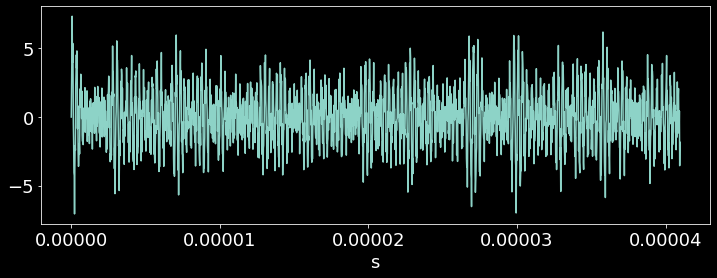

In [13]:
nsamples = 2048
samplerate = 50 * u.MHz
time = nsamples/samplerate
theta = np.linspace(0*u.s, time, nsamples).to(u.s)
signals = [np.sin(2*np.pi*(theta * freq).decompose().value) for freq in frequencies]
total_signal = np.sum(signals, axis=0)

ft_signal = np.fft.fft(total_signal)
freq = (np.fft.fftfreq(total_signal.size) * total_signal.size / (theta.max()-theta.min())).to(u.MHz)
powerspectrum = np.abs((ft_signal)**2)

pl.figure(figsize=(12,4))
pl.plot(theta, total_signal)

(2.5, 4.5)

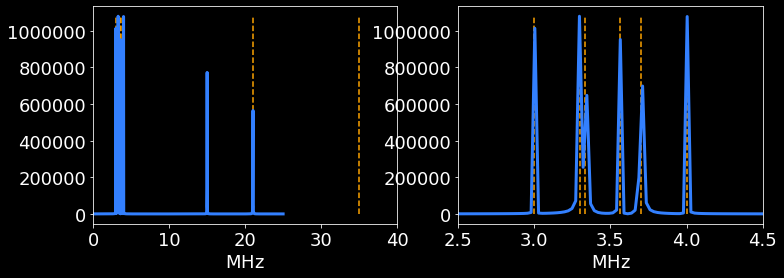

In [14]:
fig = pl.figure(figsize=(12,4))
ax1 = pl.subplot(1,2,1)
ax1.plot(freq[freq>0], powerspectrum[freq>0], color=(0.2,0.5,1), linewidth=3)
ax1.vlines(frequencies, 0, powerspectrum.max(), linestyle='--', color='orange')
ax1.set_xlim(0,40)
ax2 = pl.subplot(1,2,2)
ax2.plot(freq[freq>0], powerspectrum[freq>0], color=(0.2,0.5,1), linewidth=3)
ax2.vlines(frequencies, 0, powerspectrum.max(), linestyle='--', color='orange')
ax2.set_xlim(2.5,4.5)

In the previous cell, we observed at a sample rate too low to detect our highest-frequency signal.

However, the signal is still there!  Because it wasn't captured at the correct frequency, it got *aliased* to a lower frequency, which is why there's a spike at 17.5 MHz.

## Bandwidth

The bandwidth is equal to the sample rate divided by two:

$$ \nu_{bandwidth} = \nu_{samplerate} / 2$$

And the "channel width" is the bandwidth divided by the number of samples:

$$ \nu_{channel width} = \frac{\nu_{bandwidth}}{n_{samples}} =  \frac{\nu_{samplerate}}{2 n_{samples}} $$

## Bandwidth

The factor of 2 from the Nyquist-Shannon Theorem comes in part from the need to know both the *amplitude* and the *phase* of a signal.  If you measure a periodic signal twice, you can reconstruct both values.

In the examples above, we only got half the bandwidth because our input signal was all *real*, therefore the output frequencies are *even*: there are positive and negative frequencies, but their amplitudes are the same.

Our spectrometers actually take *two samples* for every "sample" they report.  They report these as complex numbers.

## Resolution and Bandwidth: Relating back to the observations

We want to observe our Galaxy.

Given that the Sun's orbit around the Galactic center is about 250 km/s, that's about the upper limit of what we'll need to observe (+/- 250 km/s).

What bandwidth do we need to observe Galactic rotation?

## Bandwidth to Velocity Coverage

Bandwidth is the range of frequencies covered, $\Delta \nu_{bw}$.  The velocity coverage we need is $\pm250$ km s$^{-1}$, or $\Delta v = 500$ km s$^{-1}$.  We need:

$$ \frac{\Delta \nu_{Bw}}{\nu_{obs}} = \frac{\Delta v}{c}$$

In [15]:
velocity_range = 500*u.km/u.s
bandwidth_required = (nu_rest_hi * velocity_range / constants.c).to(u.MHz)
print(f"Bandwidth required = {bandwidth_required}")

Bandwidth required = 2.368981797011551 MHz


FIN for now